In [525]:
# Importing libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [526]:
file_path = 'C://Projects_python//Project//Case Study//Input//Case Study 1 - Retail Case Study//'
file_name = 'Customer.csv'

In [527]:
customers = pd.read_csv(file_path+file_name)

In [528]:
customers.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [529]:
customers.shape

(5647, 4)

In [530]:
file_path = 'C://Projects_python//Project//Case Study//Input//Case Study 1 - Retail Case Study//'
file_name = 'prod_cat_info.csv'

In [531]:
prod_cat_info = pd.read_csv(file_path+file_name)

In [532]:
prod_cat_info.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [533]:
prod_cat_info.shape

(23, 4)

In [534]:
file_path = 'C://Projects_python//Project//Case Study//Input//Case Study 1 - Retail Case Study//'
file_name = 'Transactions.csv'

In [535]:
transactions = pd.read_csv(file_path+file_name)

In [536]:
transactions.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [537]:
transactions.shape

(23053, 10)

In [538]:
# Q1- Merging  the tables

In [539]:
transaction_prod = pd.merge(left = transactions, right = prod_cat_info, left_on='prod_subcat_code', right_on= 'prod_sub_cat_code', how = 'left')

In [540]:
transaction_prod.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,2,Footwear,1,Mens
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,4,Bags,1,Mens
3,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers
4,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY


In [541]:
transaction_prod.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code_x      0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat_code_y      0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [542]:
merged_tables = pd.merge(left= transaction_prod, right= customers, left_on= 'cust_id', right_on= 'customer_Id', how= 'left')

In [543]:
merged_tables.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women,270351,26-09-1981,M,5.0
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,2,Footwear,1,Mens,270351,26-09-1981,M,5.0
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,4,Bags,1,Mens,270351,26-09-1981,M,5.0
3,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers,270384,11-05-1973,F,8.0
4,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,27-07-1992,M,8.0


In [544]:
merged_tables.isnull().sum()

transaction_id        0
cust_id               0
tran_date             0
prod_subcat_code      0
prod_cat_code_x       0
Qty                   0
Rate                  0
Tax                   0
total_amt             0
Store_type            0
prod_cat_code_y       0
prod_cat              0
prod_sub_cat_code     0
prod_subcat           0
customer_Id           0
DOB                   0
Gender               22
city_code            15
dtype: int64

In [545]:
customers.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [546]:
# We have missing city_code and gender in the customers table so the null value exsists in the final merged table

In [547]:
merged_tables.duplicated().sum()

34

In [548]:
merged_tables.drop_duplicates(inplace=True)

In [549]:
merged_tables.isnull().sum()

transaction_id        0
cust_id               0
tran_date             0
prod_subcat_code      0
prod_cat_code_x       0
Qty                   0
Rate                  0
Tax                   0
total_amt             0
Store_type            0
prod_cat_code_y       0
prod_cat              0
prod_sub_cat_code     0
prod_subcat           0
customer_Id           0
DOB                   0
Gender               22
city_code            15
dtype: int64

In [550]:
merged_tables['city_code'] = merged_tables['city_code'].astype('object')

In [551]:
gen_mod = merged_tables['Gender'].mode()
city_mod = merged_tables['city_code'].mode()
gen_mod[0], city_mod[0]

('M', 4.0)

In [552]:
merged_tables['Gender'] = merged_tables['Gender'].fillna(gen_mod[0])
merged_tables['city_code'] = merged_tables['city_code'].fillna(city_mod[0])

In [553]:
merged_tables.duplicated().sum()

0

In [554]:
merged_tables.isnull().sum()

transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code_x      0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat_code_y      0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
customer_Id          0
DOB                  0
Gender               0
city_code            0
dtype: int64

In [555]:
# Q2 (Creating summary report)

In [556]:
# a) get the column names and their corresponding data types

In [557]:
merged_tables.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code_x', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat_code_y', 'prod_cat', 'prod_sub_cat_code', 'prod_subcat',
       'customer_Id', 'DOB', 'Gender', 'city_code'],
      dtype='object')

In [558]:
merged_tables.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code_x        int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat_code_y        int64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
dtype: object

In [559]:
# b) Top and bottom 10 observations

In [560]:
merged_tables.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women,270351,26-09-1981,M,5.0
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,2,Footwear,1,Mens,270351,26-09-1981,M,5.0
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,4,Bags,1,Mens,270351,26-09-1981,M,5.0
3,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers,270384,11-05-1973,F,8.0
4,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,27-07-1992,M,8.0
5,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,5,Books,11,Children,271509,08-06-1981,M,3.0
6,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,6,Home and kitchen,11,Bath,271509,08-06-1981,M,3.0
7,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,27-07-1992,M,8.0
8,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,3,Electronics,8,Personal Appliances,272357,09-10-1982,F,6.0
9,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,5,Books,11,Children,273667,29-05-1981,M,9.0


In [561]:
merged_tables.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
57156,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,6,Home and kitchen,12,Tools,274550,21-02-1972,M,7.0
57157,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,1,Clothing,4,Mens,270022,27-04-1984,M,9.0
57158,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,2,Footwear,4,Kids,270022,27-04-1984,M,9.0
57159,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,3,Electronics,4,Mobiles,270022,27-04-1984,M,9.0
57160,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,4,Bags,4,Women,270022,27-04-1984,M,9.0
57161,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,6,Home and kitchen,2,Furnishing,271020,20-06-1976,M,8.0
57162,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,5,Books,11,Children,270911,22-05-1970,M,2.0
57163,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,6,Home and kitchen,11,Bath,270911,22-05-1970,M,2.0
57164,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,5,Books,11,Children,271961,15-01-1982,M,1.0
57165,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,6,Home and kitchen,11,Bath,271961,15-01-1982,M,1.0


In [562]:
# Converting the DOB column format to datetime from from string

In [563]:
merged_tables['DOB'] = pd.to_datetime(arg = merged_tables['DOB'], format = '%d-%m-%Y')

In [564]:
merged_tables['DOB']

0       1981-09-26
1       1981-09-26
2       1981-09-26
3       1973-05-11
4       1992-07-27
           ...    
57161   1976-06-20
57162   1970-05-22
57163   1970-05-22
57164   1982-01-15
57165   1982-01-15
Name: DOB, Length: 57132, dtype: datetime64[ns]

In [565]:
# C) Creating five number summary

In [566]:
merged_tables.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,prod_cat_code_y,prod_sub_cat_code,customer_Id,city_code
count,5.713200e+04,57132.000000,57132.000000,57132.000000,57132.000000,57132.000000,57132.000000,57132.000000,57132.000000,57132.000000,57132.000000,57132.000000
mean,5.017127e+10,271015.590667,5.613754,3.462140,2.433277,635.817773,248.970436,2104.862902,3.446317,5.613754,271015.590667,5.496919
std,2.896419e+10,2426.904740,3.701013,1.710882,2.269068,622.652992,187.353308,2514.377631,1.710008,3.701013,2426.904740,2.864580
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,1.000000,266783.000000,1.000000
25%,2.527282e+10,268931.000000,3.000000,2.000000,1.000000,312.000000,98.490000,764.660000,2.000000,3.000000,268931.000000,3.000000
50%,5.019132e+10,270982.500000,4.000000,3.000000,3.000000,709.000000,199.395000,1761.370000,3.000000,4.000000,270982.500000,5.000000
75%,7.551051e+10,273096.000000,10.000000,5.000000,4.000000,1109.000000,364.901250,3553.680000,5.000000,10.000000,273096.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,6.000000,12.000000,275265.000000,10.000000


In [567]:
# d) frequency for all categorial value

In [568]:
merged_tables.loc[: , (merged_tables.dtypes == 'object')].describe()

,tran_date,Store_type,prod_cat,prod_subcat,Gender
count,57132,57132,57132,57132,57132
unique,1129,4,6,18,2
top,25-11-2012,e-Shop,Books,Women,M
freq,90,23069,12172,10013,29197


In [569]:
# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [570]:
# Creating function to generate all the graphs(histogram)

In [571]:
merged_tables.dtypes

transaction_id                int64
cust_id                       int64
tran_date                    object
prod_subcat_code              int64
prod_cat_code_x               int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat_code_y               int64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
dtype: object

In [572]:
graph1 = merged_tables.loc[:,['prod_subcat_code','prod_cat_code_x', 'Qty', 'Rate', 'Tax', 'total_amt']]

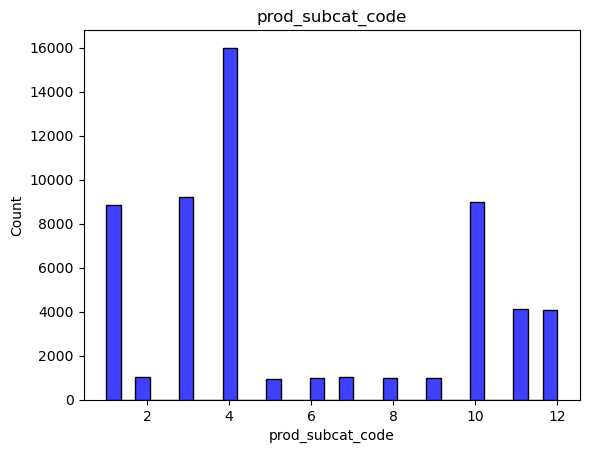

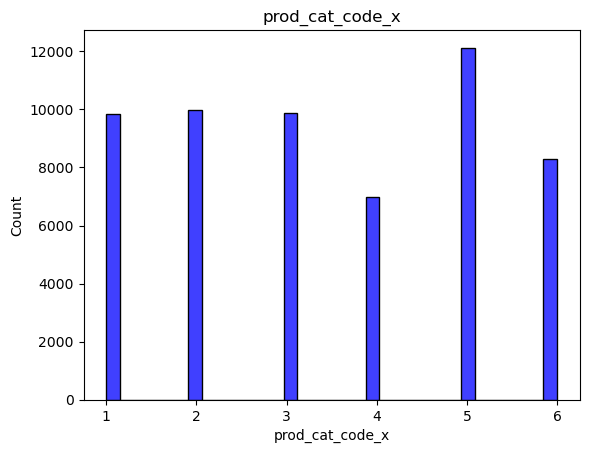

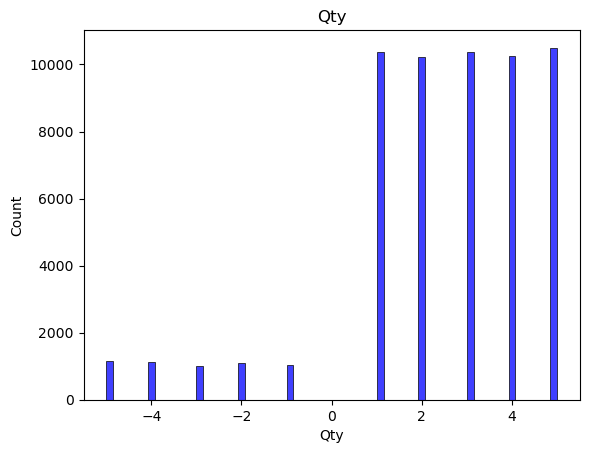

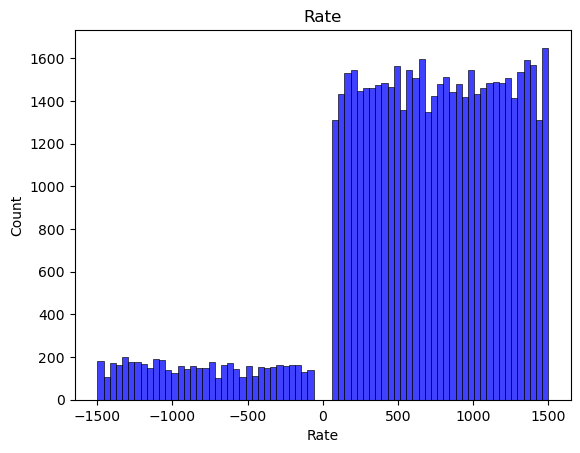

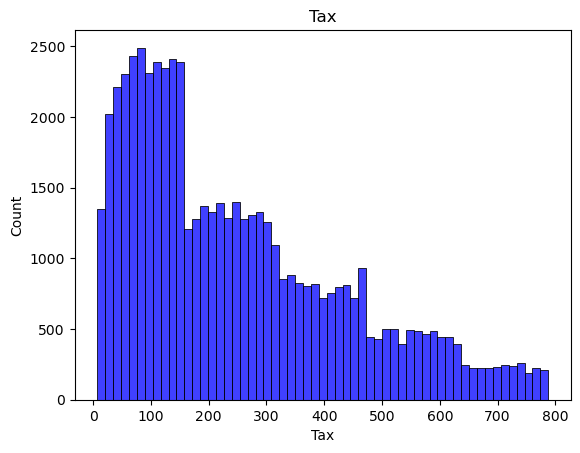

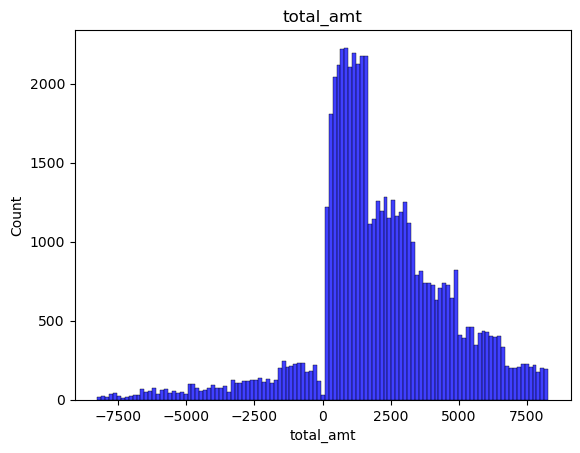

In [573]:
# Generating graph for numerical data
for var in graph1.columns:
    sns.histplot(x = graph1[var], color= 'blue')
    plt.title(var)
    plt.show()

In [574]:
# Graph for objeect datatype columns

In [575]:
graph2 = merged_tables.select_dtypes(include= 'object')
graph2.head()

,tran_date,Store_type,prod_cat,prod_subcat,Gender
0,28-02-2014,e-Shop,Clothing,Women,M
1,28-02-2014,e-Shop,Footwear,Mens,M
2,28-02-2014,e-Shop,Bags,Mens,M
3,27-02-2014,e-Shop,Electronics,Computers,F
4,24-02-2014,TeleShop,Books,DIY,M


In [576]:
graph2.dtypes

tran_date      object
Store_type     object
prod_cat       object
prod_subcat    object
Gender         object
dtype: object

In [577]:
tran_date = graph2['tran_date'].value_counts()
Store_type = graph2['Store_type'].value_counts()
prod_cat = graph2['prod_cat'].value_counts()
prod_subcat = graph2['prod_subcat'].value_counts()
Gender = graph2['Gender'].value_counts()

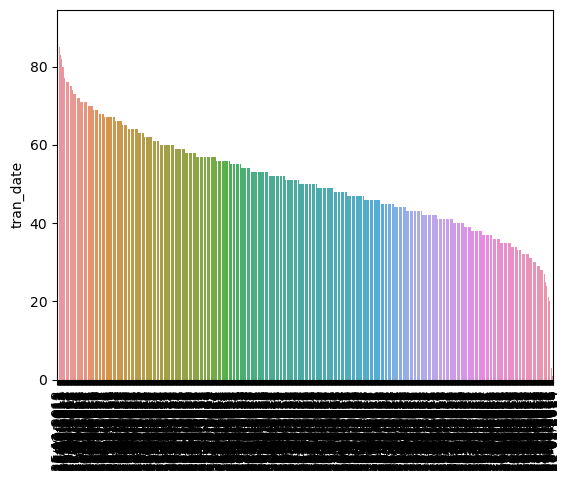

<Figure size 2500x2500 with 0 Axes>

In [578]:
# Transaction date was string type in original file but this should not be treated as obhect. This is only done for the scope of this assignment 
sns.barplot(x = tran_date.index, y = tran_date)
plt.xticks(rotation = 90)
plt.figure(figsize= [25,25])
plt.show()

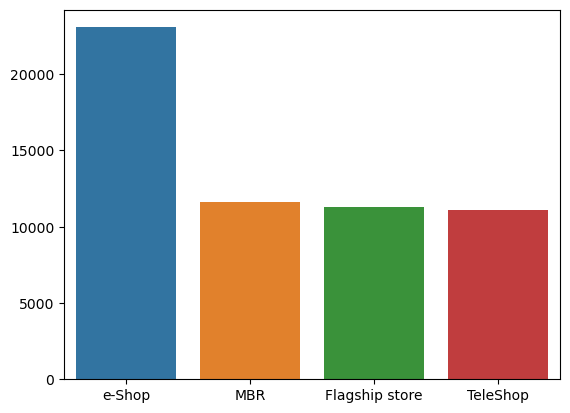

<Figure size 500x500 with 0 Axes>

In [579]:
sns.barplot(x = Store_type.index, y = Store_type.values)
plt.figure(figsize= [5,5])
plt.show()

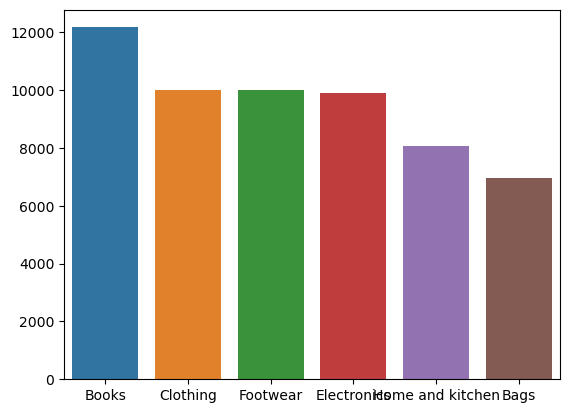

<Figure size 500x500 with 0 Axes>

In [580]:
sns.barplot(x = prod_cat.index, y = prod_cat.values)
plt.figure(figsize= [5,5])
plt.show()

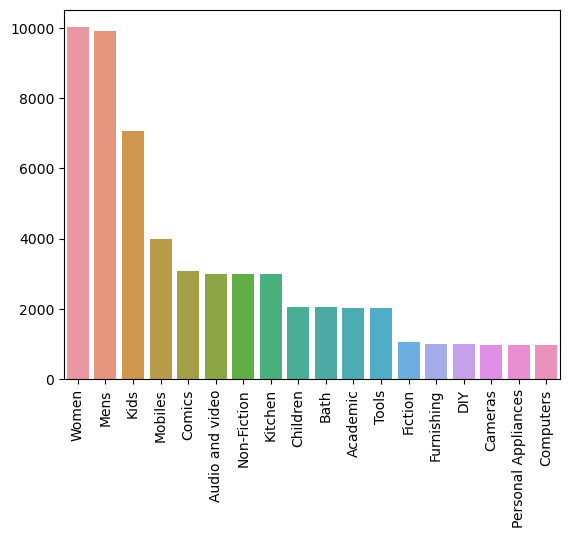

<Figure size 500x500 with 0 Axes>

In [581]:
sns.barplot(x = prod_subcat.index, y = prod_subcat.values)
plt.xticks(rotation = 90)
plt.figure(figsize= [5,5])
plt.show()

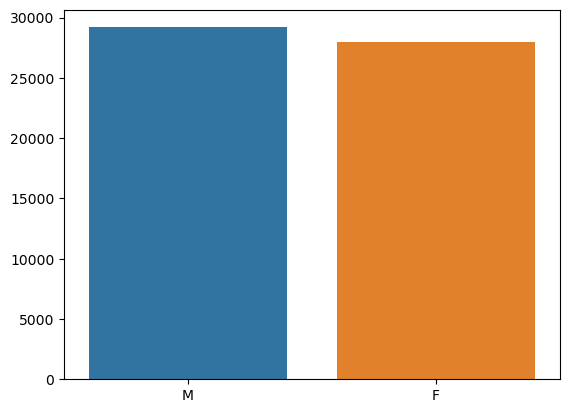

<Figure size 500x500 with 0 Axes>

In [582]:
sns.barplot(x = gender.index, y = gender.values)
plt.figure(figsize= [5,5])
plt.show()

In [583]:
# Q4- Time period for available transaction data

In [584]:
merged_tables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57132 entries, 0 to 57165
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     57132 non-null  int64         
 1   cust_id            57132 non-null  int64         
 2   tran_date          57132 non-null  object        
 3   prod_subcat_code   57132 non-null  int64         
 4   prod_cat_code_x    57132 non-null  int64         
 5   Qty                57132 non-null  int64         
 6   Rate               57132 non-null  int64         
 7   Tax                57132 non-null  float64       
 8   total_amt          57132 non-null  float64       
 9   Store_type         57132 non-null  object        
 10  prod_cat_code_y    57132 non-null  int64         
 11  prod_cat           57132 non-null  object        
 12  prod_sub_cat_code  57132 non-null  int64         
 13  prod_subcat        57132 non-null  object        
 14  custom

In [585]:
count

M    29191
F    27953
Name: Gender, dtype: int64

In [586]:
merged_tables.loc[:, 'tran_date']

0        28-02-2014
1        28-02-2014
2        28-02-2014
3        27-02-2014
4        24-02-2014
            ...    
57161    25-01-2011
57162    25-01-2011
57163    25-01-2011
57164    25-01-2011
57165    25-01-2011
Name: tran_date, Length: 57132, dtype: object

In [587]:
 merged_tables.loc[:,'tran_date'] = pd.to_datetime(arg = merged_tables.loc[:,'tran_date'])

C:\Users\pauld\AppData\Local\Temp\ipykernel_14680\2266550916.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_tables.loc[:,'tran_date'] = pd.to_datetime(arg = merged_tables.loc[:,'tran_date'])
C:\Users\pauld\AppData\Local\Temp\ipykernel_14680\2266550916.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged_tables.loc[:,'tran_date'] = pd.to_datetime(arg = merged_tables.loc[:,'tran_date'])


In [588]:
print('Maximum transaction date is: ', np.max(merged_tables.loc[:, 'tran_date']), ' and minimum transaction date is: ', np.min(merged_tables.loc[:, 'tran_date']))

Maximum transaction date is:  2014-12-02 00:00:00  and minimum transaction date is:  2011-01-02 00:00:00


In [589]:
merged_tables.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,1,Clothing,1,Women,270351,1981-09-26,M,5.0
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,2,Footwear,1,Mens,270351,1981-09-26,M,5.0


In [590]:
merged_tables.loc[merged_tables["total_amt"] < 0,"transaction_id"].count()

5396

In [591]:
#5. Analyze which product categories are more popular among females vs male customers.

In [592]:
wide_tab = merged_tables.groupby(by= ['Gender', 'prod_cat']).agg(Total_Qty = ('Qty', np.sum))

In [593]:
wide_tab

Total_Qty
Gender prod_cat                   
F      Bags                   8127
       Books                 14639
       Clothing              11826
       Electronics           11820
       Footwear              11826
       Home and kitchen       9763
M      Bags                   8760
       Books                 14918
       Clothing              12384
       Electronics           12643
       Footwear              12384
       Home and kitchen       9928

In [594]:
wide_tab.pivot_table(index="Gender",columns="prod_cat",values="Total_Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,8127,14639,11826,11820,11826,9763
M,8760,14918,12384,12643,12384,9928


In [595]:
# 6. Which City code has the maximum customers and what was the percentage of customers from
# that city?

In [596]:
merged_tables.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women,270351,1981-09-26,M,5.0
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,2,Footwear,1,Mens,270351,1981-09-26,M,5.0
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,4,Bags,1,Mens,270351,1981-09-26,M,5.0
3,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers,270384,1973-05-11,F,8.0
4,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,1992-07-27,M,8.0


In [597]:
store_df = merged_tables.groupby(by = 'city_code')['transaction_id'].count()

In [598]:
store_df.sort_values(ascending= False)

city_code
4.0     5976
5.0     5937
3.0     5882
10.0    5800
8.0     5765
7.0     5761
2.0     5610
1.0     5572
9.0     5534
6.0     5295
Name: transaction_id, dtype: int64

In [599]:
# Store 4 has the highest numbers of order and store 6 has the least number of orders

In [600]:
# 7. Which store type sells the maximum products by value and by quantity?

In [601]:
merged_tables.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women,270351,1981-09-26,M,5.0
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,2,Footwear,1,Mens,270351,1981-09-26,M,5.0
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,4,Bags,1,Mens,270351,1981-09-26,M,5.0
3,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers,270384,1973-05-11,F,8.0
4,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,1992-07-27,M,8.0


In [602]:
Store_val = merged_tables.groupby(by = ['Store_type']).agg(Total_value = ('total_amt', np.sum), Total_quantity = ('Qty', np.sum))

In [603]:
Store_val.head()

,Total_value,Total_quantity
Store_type,,
Flagship store,2.408995e+07,27622
MBR,2.401862e+07,27870
TeleShop,2.300753e+07,27090
e-Shop,4.913893e+07,56436


In [604]:
Store_val.sort_values(by = ['Total_value', 'Total_quantity'],ascending= [False, False])

,Total_value,Total_quantity
Store_type,,
e-Shop,4.913893e+07,56436
Flagship store,2.408995e+07,27622
MBR,2.401862e+07,27870
TeleShop,2.300753e+07,27090


In [605]:
# e-shop has the highest number of amount and the quantity sold.

In [606]:
# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from
# Flagship Stores?

In [607]:
merged_tables.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,1,Clothing,1,Women,270351,1981-09-26,M,5.0
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,2,Footwear,1,Mens,270351,1981-09-26,M,5.0


In [608]:
filt_df = merged_tables.loc[(merged_tables.Store_type == 'Flagship store') & (merged_tables.prod_cat.isin(['Clothing', 'Electronics'])) ,:]

In [609]:
filt_df.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
30,25963520987,274829,2014-02-20,4,4,3,502,158.130,1664.130,Flagship store,1,Clothing,4,Mens,274829,1984-09-05,F,2.0
32,25963520987,274829,2014-02-20,4,4,3,502,158.130,1664.130,Flagship store,3,Electronics,4,Mobiles,274829,1984-09-05,F,2.0
61,99581788104,267466,2014-02-20,3,2,1,96,10.080,106.080,Flagship store,1,Clothing,3,Kids,267466,1987-08-06,F,7.0
91,63407734630,271322,2014-02-19,3,2,5,1360,714.000,7514.000,Flagship store,1,Clothing,3,Kids,271322,1979-11-27,F,7.0
98,82750983847,267544,2014-02-19,3,5,1,805,84.525,889.525,Flagship store,1,Clothing,3,Kids,267544,1984-10-12,M,7.0


In [610]:
filt_df.groupby(by= ['Store_type', 'prod_cat']).agg(Total_revenue = ('total_amt', np.sum)).sum()

Total_revenue    8532314.96
dtype: float64

In [611]:
# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [612]:
merged_tables.loc[(merged_tables.Gender == 'M') & (merged_tables.prod_cat == 'Electronics'),:]['total_amt'].sum()

10961656.355

In [613]:
# 10. How many customers have more than 10 unique transactions, after removing all transactions
# which have any negative amounts?

In [614]:
merged_tables.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women,270351,1981-09-26,M,5.0
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,2,Footwear,1,Mens,270351,1981-09-26,M,5.0
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,4,Bags,1,Mens,270351,1981-09-26,M,5.0
3,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers,270384,1973-05-11,F,8.0
4,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,1992-07-27,M,8.0


In [615]:
pos_trans = merged_tables.loc[merged_tables["total_amt"]>0,:]

In [616]:
unique_trans = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [617]:
unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Bags,Mens,1
1,266783,Bags,Women,2
2,266783,Books,Non-Fiction,1
3,266783,Clothing,Mens,2
4,266783,Clothing,Women,1
...,...,...,...,...
41408,275265,Books,Academic,1
41409,275265,Clothing,Women,1
41410,275265,Footwear,Mens,1
41411,275265,Home and kitchen,Furnishing,1


In [618]:
unique_trans = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

In [619]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

In [620]:
unique_trans_count

,customer_Id,transaction_id
0,266783,10
1,266784,8
2,266785,12
3,266788,8
4,266794,18
...,...,...
5501,275257,9
5502,275261,9
5503,275262,5
5504,275264,5


In [621]:
unique_trans_count[unique_trans_count['transaction_id'] > 10].count()

customer_Id       1091
transaction_id    1091
dtype: int64

In [622]:
# There are 1091 customers with such criteria

In [623]:
# 11. For all customers aged between 25 - 35, find out:
# a. What was the total amount spent for “Electronics” and “Books” product categories?
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [624]:
merged_tables.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code_x               int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat_code_y               int64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
dtype: object

In [655]:
merged_tables.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,Age,Age_yrs
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women,270351,1981-09-26,M,5.0,15361 days 10:20:02.644554,42 days 01:23:45.753149083
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,2,Footwear,1,Mens,270351,1981-09-26,M,5.0,15361 days 10:20:02.644554,42 days 01:23:45.753149083
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,4,Bags,1,Mens,270351,1981-09-26,M,5.0,15361 days 10:20:02.644554,42 days 01:23:45.753149083
3,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers,270384,1973-05-11,F,8.0,18421 days 10:20:02.644554,50 days 10:28:04.559284732
4,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,1992-07-27,M,8.0,11404 days 10:20:02.644554,31 days 05:22:56.963646218


In [630]:
now = datetime.datetime.now()

In [654]:
datetime.datetime.timestamp(now)

1697518202.644554

In [633]:
type(now)

datetime.datetime

In [677]:
merged_tables['Age'] = (pd.Timestamp('now') - merged_tables['DOB']).dt.days / 365.2425

In [678]:
merged_tables['Age']

0        42.056990
1        42.056990
2        42.056990
3        50.434985
4        31.223092
           ...    
57161    47.324723
57162    53.405614
57163    53.405614
57164    41.753082
57165    41.753082
Name: Age, Length: 57132, dtype: float64

In [679]:
merged_tables.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,Age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women,270351,1981-09-26,M,5.0,42.056990
1,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,2,Footwear,1,Mens,270351,1981-09-26,M,5.0,42.056990
2,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,4,Bags,1,Mens,270351,1981-09-26,M,5.0,42.056990
3,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,3,Electronics,5,Computers,270384,1973-05-11,F,8.0,50.434985
4,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,1992-07-27,M,8.0,31.223092


In [680]:
age_25_35 = merged_tables.loc[(merged_tables['Age']>=25 ) & (merged_tables['Age']<= 35) ,:]

In [681]:
age_25_35.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,Age
4,51750724947,273420,2014-02-24,6,5,-2,-791,166.11,-1748.11,TeleShop,5,Books,6,DIY,273420,1992-07-27,M,8.0,31.223092
7,51750724947,273420,2014-02-23,6,5,-2,-791,166.11,-1748.11,TeleShop,5,Books,6,DIY,273420,1992-07-27,M,8.0,31.223092
44,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,1,Clothing,1,Women,268509,1989-08-17,M,10.0,34.166342
45,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,2,Footwear,1,Mens,268509,1989-08-17,M,10.0,34.166342
46,91116291703,268509,2014-02-20,1,2,4,1243,522.06,5494.06,MBR,4,Bags,1,Mens,268509,1989-08-17,M,10.0,34.166342


In [686]:
filt_age_25_35 = age_25_35.groupby(by = 'prod_cat').agg(Total_amount_spent = ('total_amt', np.sum))

In [688]:
filt_age_25_35

,Total_amount_spent
prod_cat,
Bags,2736220.890
Books,4602783.575
Clothing,3916086.850
Electronics,3805437.675
Footwear,3916086.850
Home and kitchen,3143180.235


In [690]:
filt_age_25_35.loc[(filt_age_25_35.index == 'Electronics')|(filt_age_25_35.index == 'Books')]

,Total_amount_spent
prod_cat,
Books,4602783.575
Electronics,3805437.675


In [691]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [703]:
age_25_35

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat,customer_Id,DOB,Gender,city_code,Age
4,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,1992-07-27,M,8.0,31.223092
7,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,5,Books,6,DIY,273420,1992-07-27,M,8.0,31.223092
44,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,1,Clothing,1,Women,268509,1989-08-17,M,10.0,34.166342
45,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,2,Footwear,1,Mens,268509,1989-08-17,M,10.0,34.166342
46,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,4,Bags,1,Mens,268509,1989-08-17,M,10.0,34.166342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57132,61812307223,274306,2011-01-25,4,4,4,1447,607.740,6395.740,e-Shop,4,Bags,4,Women,274306,1989-01-12,M,2.0,34.760467
57144,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,1,Clothing,4,Mens,273982,1991-10-12,M,4.0,32.014347
57145,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,2,Footwear,4,Kids,273982,1991-10-12,M,4.0,32.014347
57146,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,3,Electronics,4,Mobiles,273982,1991-10-12,M,4.0,32.014347


In [697]:
age_25_35.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code_x               int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat_code_y               int64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
Age                         float64
dtype: object

In [698]:
date1 = '01/01/2014'
date2 = '01/03/2014'

In [700]:
date1 = datetime.datetime.strptime(date1,'%d/%m/%Y')
date2 = datetime.datetime.strptime(date2,'%d/%m/%Y')

In [707]:
Total_amt_age_25_35 = age_25_35[(age_25_35.tran_date >= date1)&(age_25_35.tran_date <= date2)]

In [709]:
Total_amt_age_25_35.total_amt.sum()

849725.1099999999

In [ ]:
''' _____________________________________________________END________________________________________________________'''